Valores nulos por coluna:
 distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64
K = 1 | Acurácia: 0.9942
K = 2 | Acurácia: 0.9921
K = 3 | Acurácia: 0.9933
K = 4 | Acurácia: 0.9922
K = 5 | Acurácia: 0.9929
K = 6 | Acurácia: 0.9917
K = 7 | Acurácia: 0.9924
K = 8 | Acurácia: 0.9913
K = 9 | Acurácia: 0.9918
K = 10 | Acurácia: 0.9913

 Melhor K encontrado: 1
 Melhor acurácia com K=1: 0.9942

 Acurácia final com todo o treino: 0.9988


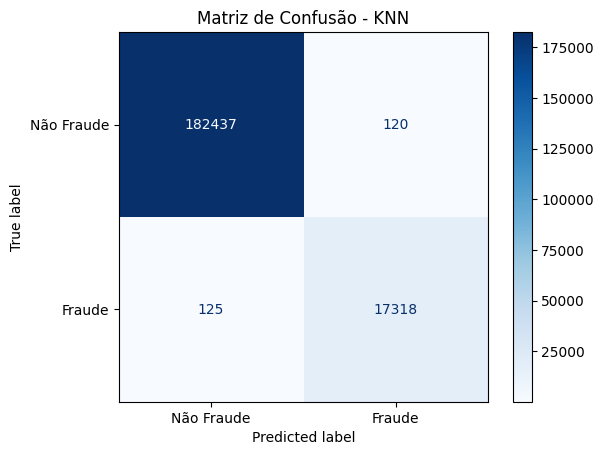

In [ ]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Carregando o dataset
df = pd.read_csv('card_transdata.csv')  # Ajuste o caminho se necessário

# 2. Verificando valores nulos
print("Valores nulos por coluna:\n", df.isnull().sum())

# 3. Separando variáveis preditoras e variável alvo
X_raw = df.drop('fraud', axis=1)  # Todas as colunas menos 'fraud'
y = df['fraud']  # Coluna alvo

# 4. Normalizando os dados
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_raw), columns=X_raw.columns)

# 5. Separando dados de treino e teste (80% treino, 20% teste)
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Encontrando o melhor valor de K com uma amostra de treino
valores_k = []
acuracias = []

melhor_k = 1
melhor_acc = 0

x_amostra = x_treino[:10000]
y_amostra = y_treino[:10000]

# Calculando as acurácias para K de 1 a 10
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_amostra, y_amostra)

    y_pred = knn.predict(x_teste)
    acc = accuracy_score(y_teste, y_pred)

    valores_k.append(k)
    acuracias.append(acc)

    print(f"K = {k} | Acurácia: {acc:.4f}")

    if acc > melhor_acc:
        melhor_k = k
        melhor_acc = acc

# 7. Treinar o modelo final com o melhor K
print("\n Melhor K encontrado:", melhor_k)
print(f" Melhor acurácia com K={melhor_k}: {melhor_acc:.4f}")

knn_final = KNeighborsClassifier(n_neighbors=melhor_k)
knn_final.fit(x_treino, y_treino)

y_pred_final = knn_final.predict(x_teste)
acc_final = accuracy_score(y_teste, y_pred_final)

print(f"\n Acurácia final com todo o treino: {acc_final:.4f}")

# 8. Matriz de Confusão
cm = confusion_matrix(y_teste, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não Fraude", "Fraude"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - KNN")
plt.show()

Valores de K: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Acurácias: [0.99418, 0.99206, 0.993255, 0.992165, 0.992905, 0.991655, 0.99236, 0.99134, 0.99177, 0.991285]


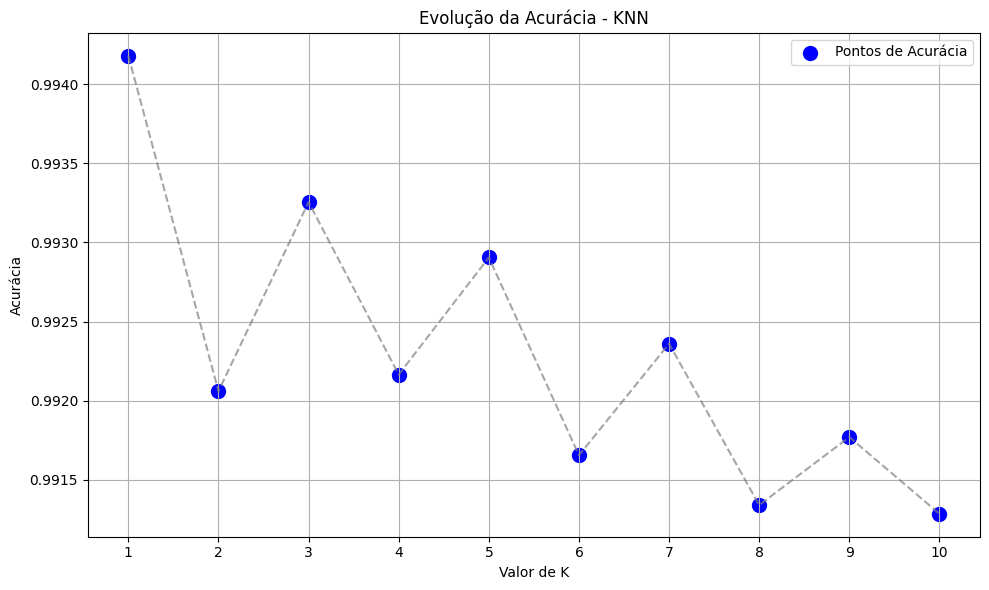

In [ ]:
# Força o modo de exibição inline no Google Colab
%matplotlib inline
import matplotlib.pyplot as plt

# Exibe os valores para garantir que estão preenchidos
print("Valores de K:", valores_k)
print("Acurácias:", acuracias)

# Gráfico da evolução da acurácia
plt.figure(figsize=(10, 6))

# Pontos com bolinhas (scatter)
plt.scatter(valores_k, acuracias, color='blue', label='Pontos de Acurácia', s=100)

# Linha conectando os pontos
plt.plot(valores_k, acuracias, linestyle='--', color='gray', alpha=0.7)

# Títulos e rótulos
plt.title('Evolução da Acurácia - KNN')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')

# Detalhes do gráfico
plt.xticks(valores_k)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()